# CAPPI插值示例
要求pycwr版本>=0.2.15

In [34]:
%matplotlib inline
from pycwr.io import read_auto
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pycwr.draw.RadarPlot import plot_xy, Graph, plot_lonlat_map, GraphMap

## 读取数据部分



In [11]:
PRD = read_auto("/Users/zhengyu/OneDrive/Work/13_天气雷达库_pycwr/test_data/Z9040.20190905.175751.AR2.bz2")

In [12]:
PRD.fields[0]

<xarray.Dataset>
Dimensions:    (range: 2400, time: 729)
Coordinates:
    azimuth    (time) float64 133.4 133.9 134.4 134.9 ... 132.7 133.2 133.7
    elevation  (time) float64 0.02 0.02 0.02 0.02 0.02 ... 0.0 0.0 0.0 0.0 0.0
    x          (time, range) float64 90.73 181.5 272.2 ... 2.168e+05 2.169e+05
    y          (time, range) float64 -85.95 -171.9 ... -2.069e+05 -2.07e+05
    z          (time, range) float64 3.024e+03 3.024e+03 ... 8.314e+03 8.319e+03
    lat        (time, range) float64 30.03 30.03 30.03 ... 28.15 28.15 28.15
    lon        (time, range) float64 119.0 119.0 119.0 ... 121.2 121.2 121.2
  * range      (range) float64 125.0 250.0 375.0 ... 2.998e+05 2.999e+05 3e+05
  * time       (time) datetime64[ns] 2019-09-05T17:58:32.575950 ... 2019-09-0...
Data variables:
    V          (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    W          (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    dBT        (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    dBZ        (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    SQI        (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    CPA        (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    ZDR        (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    CC         (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    PhiDP      (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    KDP        (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    SNRH       (time, range) float64 nan nan nan nan nan ... -3.0 nan nan nan

## 根据距离雷达中心的x和y生成cappi数据

In [15]:
x1d = np.arange(-200000, 200001, 1000) ##x方向1km等间距， -200km～200km范围
y1d = np.arange(-200000, 200001, 1000) ##y方向1km等间距， -200km～200km范围
PRD.add_product_CAPPI_xy(XRange=x1d, YRange=y1d, level_height=1500) ##插值1500m高度的
#XRange: np.ndarray, 1d, units:meters
# YRange: np.ndarray, 1d, units:meters
# level_height: 要插值的高度，常量, units:meters

In [16]:
PRD.product ##可以查看1500m的cappi的产品

<xarray.Dataset>
Dimensions:       (x_cappi_1500: 401, y_cappi_1500: 401)
Coordinates:
  * x_cappi_1500  (x_cappi_1500) int64 -200000 -199000 -198000 ... 199000 200000
  * y_cappi_1500  (y_cappi_1500) int64 -200000 -199000 -198000 ... 199000 200000
Data variables:
    CAPPI_1500    (x_cappi_1500, y_cappi_1500) float64 nan nan nan ... nan nan

/Users/zhengyu/anaconda3/envs/pycwr/lib/python3.9/site-packages/pycwr-0.2.15-py3.9-macosx-10.9-x86_64.egg/pycwr/draw/RadarPlot.py:602: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  gci = ax.pcolormesh(x / 1000., y / 1000., data, cmap=cmaps, \


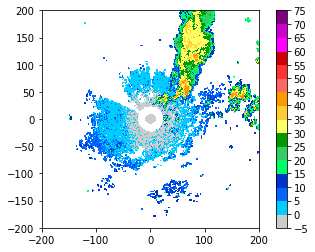

In [19]:
grid_x, grid_y = np.meshgrid(x1d, y1d, indexing="ij")
fig, ax = plt.subplots()
plot_xy(ax, grid_x, grid_y, PRD.product.CAPPI_1500) ##画图显示

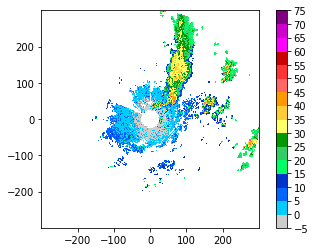

In [22]:
#显示 0.5度仰角进行对比

fig, ax = plt.subplots()
graph = Graph(PRD)
graph.plot_ppi(ax, 0, "dBZ", cmap="CN_ref") ## 0代表第一层, dBZ代表反射率产品，cmap
plt.show()

## 根据经纬度信息生成cappi数据

In [29]:
lon1d = np.arange(117, 121.0001, 0.01) ##lon方向0.01等间距，117-121 范围
lat1d = np.arange(28, 32.0001, 0.01) ##lat方向0.01等间距， 28～32度范围
PRD.add_product_CAPPI_lonlat(XLon=lon1d, YLat=lat1d, level_height=1500) ##插值1500m高度的
# XLon:np.ndarray, 1d, units:degrees
# YLat:np.ndarray, 1d, units:degrees
# level_height:常量，要计算的高度 units:meters

In [31]:
PRD.product ##可查看lat lon坐标的cappi

<xarray.Dataset>
Dimensions:         (lat_cappi_1500: 401, lon_cappi_1500: 401, x_cappi_1500: 401, y_cappi_1500: 401)
Coordinates:
  * x_cappi_1500    (x_cappi_1500) int64 -200000 -199000 ... 199000 200000
  * y_cappi_1500    (y_cappi_1500) int64 -200000 -199000 ... 199000 200000
  * lon_cappi_1500  (lon_cappi_1500) float64 117.0 117.0 117.0 ... 121.0 121.0
  * lat_cappi_1500  (lat_cappi_1500) float64 28.0 28.01 28.02 ... 31.99 32.0
Data variables:
    CAPPI_1500      (x_cappi_1500, y_cappi_1500) float64 nan nan nan ... nan nan
    CAPPI_geo_1500  (lon_cappi_1500, lat_cappi_1500) float64 nan nan ... nan nan

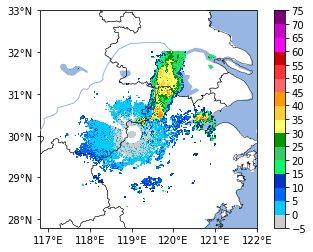

In [32]:
grid_lon, grid_lat = np.meshgrid(lon1d, lat1d, indexing="ij")
ax = plt.axes(projection=ccrs.PlateCarree())
plot_lonlat_map(ax, grid_lon, grid_lat, PRD.product.CAPPI_geo_1500, transform=ccrs.PlateCarree())
plt.show()##画图显示

/Users/zhengyu/anaconda3/envs/pycwr/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


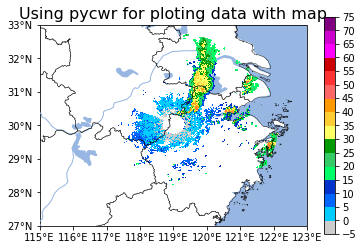

In [35]:
ax = plt.axes(projection=ccrs.PlateCarree())
graph = GraphMap(PRD, ccrs.PlateCarree()) ##叠加地图
graph.plot_ppi_map(ax, 0, "dBZ", cmap="CN_ref") ## 0代表第一层, dBZ代表反射率产品
ax.set_title("Using pycwr for ploting data with map", fontsize=16)
plt.show()